# Balazs NBA random kod

**Create dataset**

In [10]:
import pandas as pd
import numpy as np

arr = [
    ['a', 1],
    ['a', 2],
    ['a', 3],
    ['a', 4],
    ]

df = pd.DataFrame(arr, columns=['char', 'num'])
df

,char,num
0,a,1
1,a,2
2,a,3
3,a,4


In [16]:
dfnew = df.pivot_table(index='char', columns='num', aggfunc=len)
dfnew

num,1,2,3,4
char,,,,
a,1,1,1,1


In [17]:
dfnew.shape

(1, 4)

**Format**

In [7]:
temp = []
for number in df['num'].unique():
    temp.append(df[df['num'] == number])
    
temp[0]

,char,num
0,a,1


In [9]:
dfnew = temp[0]
for i in range(1, len(temp)):
    temp[i] = temp[i].rename(columns={'num': 'num' + str(i)})
    dfnew = dfnew.merge(temp[i], on='char')
    
dfnew

,char,num,num1,num2,num3
0,a,1,2,3,4


# Forgi tutorial

## Regression

In [8]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

def f(x):
    return 2*x + 1

X = np.concatenate([np.linspace(0, 7, 75),np.linspace(8, 10, 25)])
y = f(X) + np.random.normal(0, 2, 100)
df = pd.DataFrame({'X': X, 'y': y})
df

,X,y
0,0.000000,1.168749
1,0.094595,1.432553
2,0.189189,0.778049
3,0.283784,0.686008
4,0.378378,4.313264
...,...,...
95,9.666667,18.839809
96,9.750000,19.748408
97,9.833333,21.966763
98,9.916667,18.718874


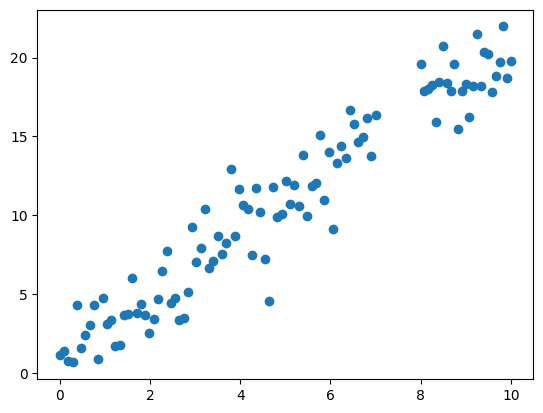

In [9]:
plt.scatter(X, y)

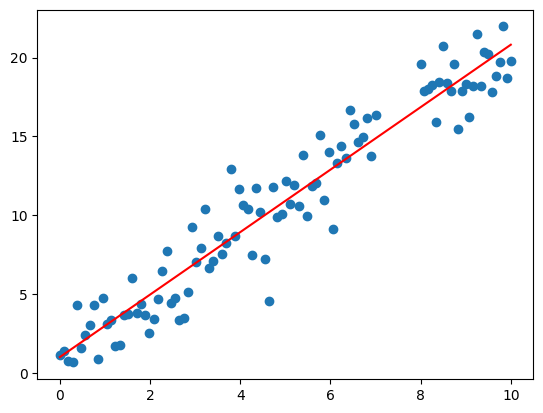

In [10]:
linreg = LinearRegression()
linreg.fit(df[['X']], df['y'])
linreg.coef_
linreg.intercept_
plt.scatter(X, y)
plt.plot(X, linreg.predict(df[['X']]), color='red')

## Classification

In [89]:
X = np.concatenate([np.random.multivariate_normal([0, 0], [[1, 0], [0, 1]], 100),
                    np.random.multivariate_normal([2, 4], [[1, 0], [0, 1]], 100),
                    np.random.multivariate_normal([-3, 3], [[1, 0], [0, 1]], 100)])
y = np.concatenate([np.zeros(100), np.ones(100), np.ones(100) * 2])

df = pd.DataFrame({'X1': X[:, 0], 'X2': X[:, 1], 'y': y})
df

,X1,X2,y
0,-0.302314,-1.852879,0.0
1,0.406571,-0.104039,0.0
2,-0.938469,-0.408336,0.0
3,0.069102,0.670574,0.0
4,0.701137,0.329014,0.0
...,...,...,...
295,-3.749076,4.101352,2.0
296,-4.795477,1.051346,2.0
297,-1.610142,2.130896,2.0
298,-2.399385,4.094981,2.0


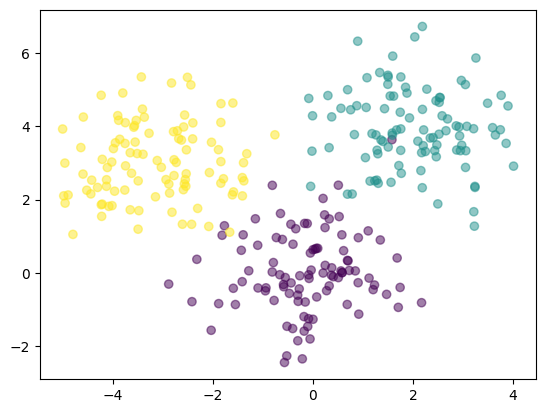

In [90]:
plt.scatter(df['X1'], df['X2'], c=y, alpha=0.5)

C:\Users\szmid\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


(-3.0, 6.5)

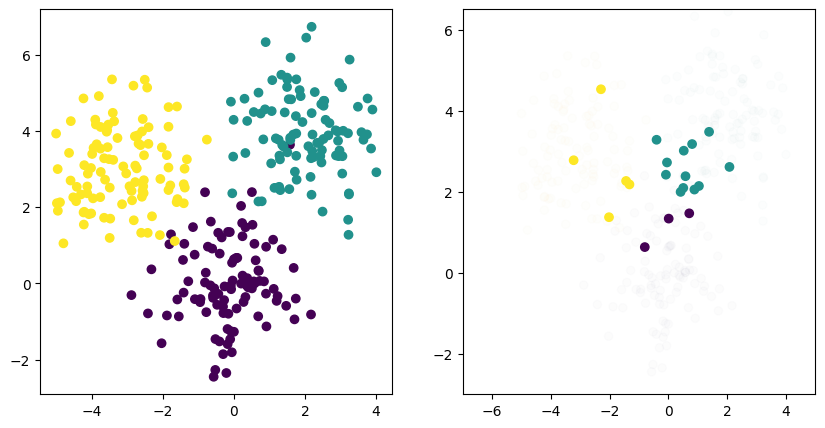

In [91]:
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

nb = RandomForestClassifier(max_depth=2, random_state=0)
nb.fit(df[['X1', 'X2']], df['y'])
fig, ax = plt.subplots(1,2, figsize=(10, 5))
ax[0].scatter(df['X1'], df['X2'], c=y)
test = np.random.multivariate_normal([0, 2.4], [[2, 0], [0, 1]], 20)
ax[1].scatter(df['X1'], df['X2'], c=y, alpha=0.01)
ax[1].scatter(test[:,0],test[:,1], c=nb.predict(test))
ax[1].set_xlim(-7,5)
ax[1].set_ylim(-3,6.5)


In [92]:
nb.feature_importances_

array([0.4915013, 0.5084987])

## Clustering

In [65]:
X = np.concatenate([np.random.multivariate_normal([0, 0], [[2, 3], [0, 1]], 200),
                    np.random.multivariate_normal([6, 1], [[1,0], [-2,1]], 100)])
df = pd.DataFrame({'X1': X[:, 0], 'X2': X[:, 1]})
df

C:\Users\szmid\AppData\Local\Temp\ipykernel_21984\1401712879.py:1: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  X = np.concatenate([np.random.multivariate_normal([0, 0], [[2, 3], [0, 1]], 200),
C:\Users\szmid\AppData\Local\Temp\ipykernel_21984\1401712879.py:2: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  np.random.multivariate_normal([6, 1], [[1,0], [-2,1]], 100)])


,X1,X2
0,-1.004605,0.353383
1,0.091689,0.262320
2,-1.121566,-2.862750
3,1.542688,2.691691
4,-0.313411,0.392564
...,...,...
295,5.891489,1.857389
296,4.466213,1.450651
297,5.177153,0.686978
298,7.803995,0.515759


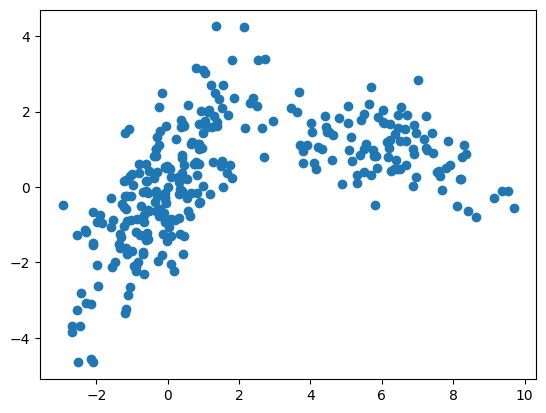

In [66]:
plt.scatter(df['X1'], df['X2'])

C:\Users\szmid\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


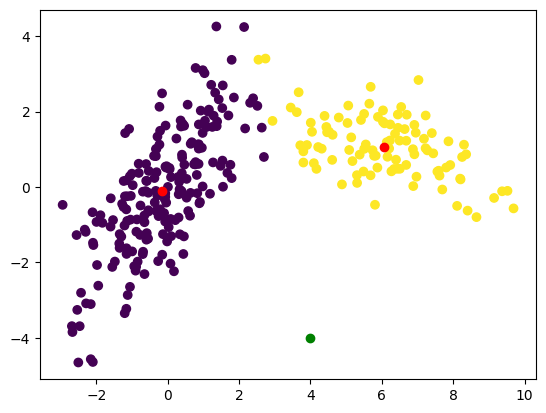

In [72]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2)
kmeans.fit(df)
kmeans.cluster_centers_
df['cluster'] = kmeans.predict(df)

plt.scatter(df['X1'], df['X2'], c=df['cluster'])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red')
plt.scatter(4,-4, c='green')